<a href="https://colab.research.google.com/github/Sanjanac6/pseudo-colouring-of-black-and-white-images-using-CNN/blob/main/Colour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Colouring Black & White Images Using CNN

In [ ]:
# import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# path to the Caffe prototxt file
prototxt = 'colorization_deploy_v2.prototxt'
# path to the Caffe pre-trained model
model = 'colorization_release_v2.caffemodel'
# path to a NumPy cluster center points file
points = 'pts_in_hull.npy'
# path to our input black & white image
bw_image = 'jorgen-hendriksen-M_v-Ckr7YE4-unsplash.jpg'

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving jorgen-hendriksen-M_v-Ckr7YE4-unsplash.jpg to jorgen-hendriksen-M_v-Ckr7YE4-unsplash.jpg


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving colorization_release_v2.caffemodel to colorization_release_v2.caffemodel


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving pts_in_hull.npy to pts_in_hull.npy


In [ ]:
net = cv2.dnn.readNetFromCaffe(prototxt, model)
pts = np.load(points)

NameError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
layer1 = net.getLayerId('class8_ab')
print(layer1)
layer2 = net.getLayerId('conv8_313_rh')
print(layer2)

NameError: ignored

In [ ]:
pts = pts.transpose().reshape(2, 313, 1, 1)
net.getLayer(layer1).blobs = [pts.astype('float32')]
net.getLayer(layer2).blobs = [np.full([1, 313], 2.606, dtype = 'float32')]

NameError: ignored

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test_image.jpg to test_image.jpg


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving desert2.jpg to desert2.jpg


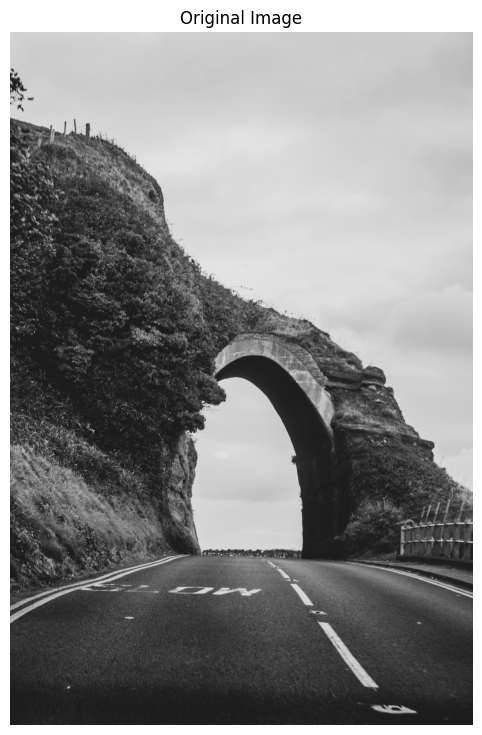

In [ ]:
# read image from the path
test_image = cv2.imread(bw_image)
# convert image into gray scale
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
# convert image from gray scale to rgb format
test_image = cv2.cvtColor(test_image, cv2.COLOR_GRAY2RGB)
# check image using matplotlib
plt.imshow(test_image)
plt.rcParams['figure.figsize'] = [16, 9]
plt.title('Original Image')
plt.axis('off')
plt.show()

In [ ]:
# normalise the image
normalised= test_image.astype("float32") / 255.0
# convert the image into LAB
lab_image = cv2.cvtColor(normalised, cv2.COLOR_RGB2LAB)
# resize the image
resized = cv2.resize(lab_image, (224, 224))

In [ ]:
# extract the value of L for Lab image
L = cv2.split(resized)[0]
L -= 50   # OR we can write L = L - 50

In [ ]:
# set the input
net.setInput(cv2.dnn.blobFromImage(L))
# findi the values of a and b
ab = net.forward()[0, :, :, :].transpose((1, 2, 0))
# resize
ab = cv2.resize(ab, (test_image.shape[1], test_image.shape[0]))

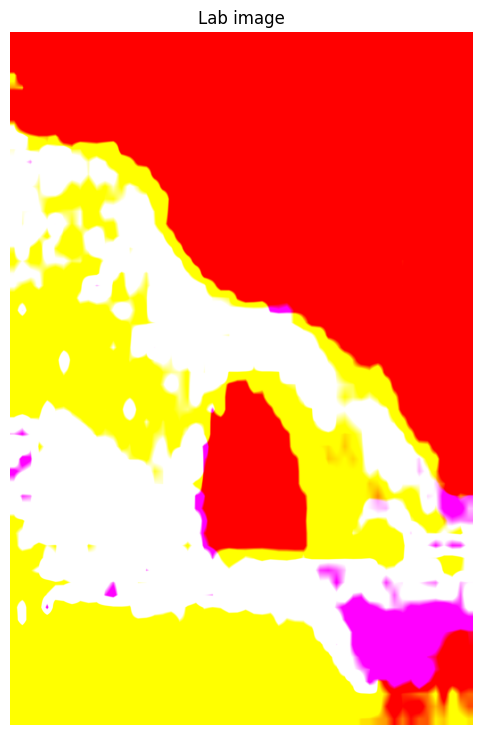

In [ ]:
L = cv2.split(lab_image)[0]
# combining L, a, b
Lab_coloured = np.concatenate((L[:, :, np.newaxis], ab), axis = 2)
# check the Lab image
plt.imshow(Lab_coloured)
plt.rcParams['figure.figsize'] = [16, 9]
plt.title('Lab image')
plt.axis('off')
plt.show()

In [ ]:
# convert Lab image to RGB_colored
RGB_coloured = cv2.cvtColor(Lab_coloured, cv2.COLOR_LAB2RGB)

In [ ]:
# limits the values in array
RGB_coloured = np.clip(RGB_coloured, 0, 1)
# change the pixel intensity back to [0,255]
RGB_coloured = (255 * RGB_coloured).astype('uint8')

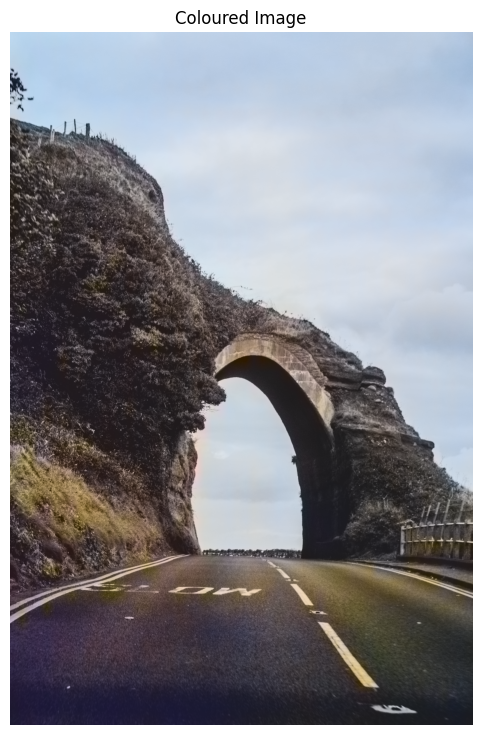

In [ ]:
# check the final coloured image
plt.imshow(RGB_coloured)
plt.rcParams['figure.figsize'] = [16, 9]
plt.title('Coloured Image')
plt.axis('off')
plt.show()

In [ ]:
# converting RGB to BGR
RGB_BGR = cv2.cvtColor(RGB_coloured, cv2.COLOR_RGB2BGR)
# save the image in desired path
# cv2.imwrite('../'+bw_image, RGB_BGR)
cv2.imwrite('coloured_image.jpg', RGB_BGR)

True

___